In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
conv1 = np.loadtxt('data/convergence1.txt')
conv2 = np.loadtxt('data/convergence2.txt')
conv3 = np.loadtxt('data/convergence3.txt').reshape(1,8)

In [3]:
data = np.concatenate([conv1, conv2, conv3], axis=0).T

In [4]:
# meshtest               
# Number of degrees of freedom (1)
# Velocity magnitude (m/s), Point: (0.185, 0.065, 0.0525)
# Velocity magnitude (m/s), Point: (0.185, 0.065, 0.065)
# Velocity magnitude (m/s), Point: (0.185, 0.065, 0.0775)
# Pressure (Pa), Point: (0.185, 0.065, 0.0525)
# Pressure (Pa), Point: (0.185, 0.065, 0.065)
# Pressure (Pa), Point: (0.185, 0.065, 0.0775)

In [5]:
data.shape

(8, 25)

In [6]:
data_sorted = data[:, np.argsort(data[1, :])]

In [7]:
dof = data_sorted[1]
vel = data_sorted[2:5]
p   = data_sorted[5:] 

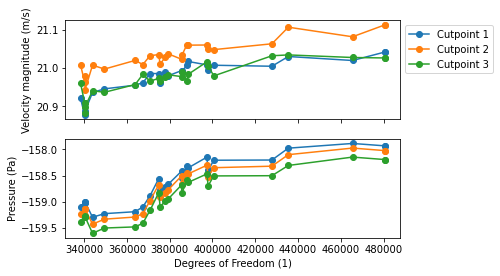

In [8]:
fig, ax = plt.subplots(2, 1, sharex=True) # 
for i in range(3):
    ax[0].plot(dof, vel[i], '-o', label=f"Cutpoint {i+1}")
    ax[1].plot(dof, p[i], '-o')
ax[1].set_xlabel("Degrees of Freedom (1)")
ax[1].set_ylabel("Pressure (Pa)")
ax[0].set_ylabel("Velocity magnitude (m/s)")
ax[0].legend(loc="upper left", bbox_to_anchor=(1.0, 1.0), )
plt.savefig("figures/convergence.pdf", bbox_inches="tight")

# Validation

In [21]:
valid = np.loadtxt('data/validation.txt').T #  x, y, z, u (m/s), uplus (1), k/u_tau_probe^2 (1), yplus (1), k (m^2/s^2)
uplus_dns_data = np.loadtxt("reference_data/9_Lab2_uplus_DNS_Retau395_Kim_etal_211028_1.txt").T #y+, U+
kplus_dns_data = np.loadtxt("reference_data/9_Lab2_kplus_DNS_Retau395_Kim_etal_211028_1.txt").T #y+, k+

## x                       y                        z                        u (m/s)                  sqrt(2/3*k)/spf.U (1)    uplus (1)                k/u_tau_probe^2 (1)           yplus
comp_sensor    = np.loadtxt('data/comparison_sensor.txt').T
comp_injector  = np.loadtxt("data/comparison_injector.txt").T
comp_reference = np.loadtxt("data/comparison_reference.txt").T

In [22]:
cutplanes = np.unique(comp_sensor[0])

In [23]:
cutplanes

array([0.1575, 0.185 , 0.2125])

In [24]:
sensor = list()
injector = list()
reference = list()
for i in range(3):
    s_tmp = comp_sensor[:, comp_sensor[0] == cutplanes[i]]
    s_tmp = s_tmp[:, s_tmp[2] < 0.065]
    s_sort = s_tmp[:, np.argsort(s_tmp[2, :])]
    sensor.append(s_sort)

    i_tmp = comp_injector[:, comp_injector[0] == cutplanes[i]]
    i_tmp = i_tmp[:, i_tmp[2] < 0.065]
    i_sort = i_tmp[:, np.argsort(i_tmp[2, :])]
    injector.append(i_sort)    
    r_tmp = comp_reference[:, comp_reference[0] == cutplanes[i]]
    r_tmp = r_tmp[:, r_tmp[2] < 0.065]
    
    r_sort = r_tmp[:, np.argsort(r_tmp[2, :])]
    reference.append(r_sort)
    
    #i_tmp = comp_injector[:, comp_injector[0] == cutplanes[i]]
    #s_sort = comp_sensor[:, np.argsort(comp_sensor[2, :])]
    #sensor.append(s_sort )

In [25]:
np.max(comp_sensor[2])-np.min(comp_sensor[2])
np.min(comp_sensor[2]) + 0.025

0.065

In [74]:
dns_new = np.loadtxt("reference_data/chann1000.dat")
dns_new_yplus = dns_new[:, 1]
dns_new_uplus = dns_new[:, 2]
dns_new_kplus = (dns_new[:, 3]**2 + dns_new[:, 4]**2 + dns_new[:, 5]**2)/2

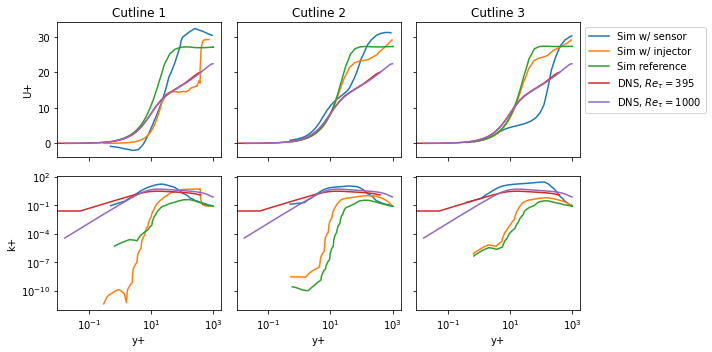

In [86]:
# DNS
uplus_dns  = uplus_dns_data[1]
yplus_dns1 = uplus_dns_data[0]
kplus_dns  = kplus_dns_data[1]
yplus_dns2 = kplus_dns_data[0]


fig, ax = plt.subplots(2, 3, sharex=True, sharey='row', figsize=(10, 5)) # 

for i in range(3):
    uplus_sensor = sensor[i][-3]
    uplus_injector = injector[i][-3]
    uplus_reference = reference[i][-3]
    
    kplus_sensor = sensor[i][-2]
    kplus_injector = injector[i][-2]
    kplus_reference = reference[i][-2]
    
    yplus_sensor = sensor[i][-1]
    yplus_injector = injector[i][-1]
    yplus_reference = reference[i][-1]
    
    ax[0][i].semilogx(yplus_sensor, uplus_sensor , label="Sim w/ sensor")
    ax[0][i].plot(yplus_injector, uplus_injector, label="Sim w/ injector")
    ax[0][i].plot(yplus_reference, uplus_reference, label="Sim reference")
    ax[0][i].plot(yplus_dns1, uplus_dns, label="DNS, $Re_{\\tau}=395$")
    ax[0][i].plot(dns_new_yplus, dns_new_uplus, label="DNS, $Re_{\\tau}=1000$")
    
    ax[1][i].loglog(yplus_sensor, kplus_sensor)
    ax[1][i].plot(yplus_injector, kplus_injector)
    ax[1][i].plot(yplus_reference, np.clip(kplus_reference, 1e-10, None))
    ax[1][i].plot(yplus_dns2, kplus_dns)
    ax[1][i].plot(dns_new_yplus, dns_new_kplus)

    #ax[0].plot(dof, vel[i], '-o', label=f"Cutpoint {i+1}")
    #ax[1].plot(dof, p[i], '-o')
    
    
    ax[1][i].set_xlabel("y+")
    ax[0][i].set_title(f"Cutline {i+1}")
    
ax[1][0].set_ylabel("k+")
ax[0][0].set_ylabel("U+")
ax[0][2].legend(loc="upper left", bbox_to_anchor=(1.0, 1.0), )
plt.tight_layout()

#ax[0].set_ylabel("Velocity magnitude (m/s)")
#ax[0].legend(loc="upper left", bbox_to_anchor=(1.0, 1.0), )
plt.savefig("figures/comparison.pdf", bbox_inches="tight")

In [49]:

"""
    sensor_kplus = comp_sensor_sorted[-2]
injector_kplus = comp_injector_sorted[-2]
reference_kplus = comp_reference_sorted[-2]

sensor_yplus = comp_sensor_sorted[-1]
injector_yplus = comp_injector_sorted[-1]
reference_yplus = comp_reference_sorted[-1]

sensor_uplus = comp_sensor_sorted[-3]
injector_uplus = comp_injector_sorted[-3]
reference_uplus = comp_reference_sorted[-3]

"""

'\n    sensor_kplus = comp_sensor_sorted[-2]\ninjector_kplus = comp_injector_sorted[-2]\nreference_kplus = comp_reference_sorted[-2]\n\nsensor_yplus = comp_sensor_sorted[-1]\ninjector_yplus = comp_injector_sorted[-1]\nreference_yplus = comp_reference_sorted[-1]\n\nsensor_uplus = comp_sensor_sorted[-3]\ninjector_uplus = comp_injector_sorted[-3]\nreference_uplus = comp_reference_sorted[-3]\n\n'

In [56]:
reference[1][-2]

array([ 2.51201066e-10,  2.23009808e-10,  1.34107286e-10,  1.14048095e-10,
       -8.26632878e-23,  4.76547816e-11,  1.97878212e-10,  2.31789233e-10,
        4.24490783e-10,  5.14115324e-10,  7.96518600e-10,  8.60305374e-10,
        1.22256030e-09,  3.30820435e-09,  9.87624312e-09,  1.13607652e-08,
        1.97850517e-08,  3.82933658e-08,  9.65407331e-08,  1.09716804e-07,
        1.84420107e-07,  7.11003477e-07,  2.36688712e-06,  2.74183217e-06,
        4.86530267e-06,  1.94715758e-05,  6.53582251e-05,  7.57607753e-05,
        1.34597458e-04,  2.65442107e-04,  6.76027544e-04,  7.69240769e-04,
        1.29562227e-03,  2.57046539e-03,  6.56535200e-03,  7.47385334e-03,
        1.25945014e-02,  1.73686535e-02,  3.23042003e-02,  3.57078158e-02,
        5.48480376e-02,  5.86655933e-02,  7.05656620e-02,  7.33113516e-02,
        8.84487462e-02,  9.56152761e-02,  1.17840433e-01,  1.46349780e-01,
        1.51494669e-01,  2.13186832e-01,  2.22371158e-01,  2.39481029e-01,
        2.88504728e-01,  

In [17]:
comp_sensor_sorted    = comp_sensor[:, np.argsort(comp_sensor[2, :])].T
comp_injector_sorted  = comp_injector[:, np.argsort(comp_injector[2, :])].T
comp_reference_sorted = comp_reference[:, np.argsort(comp_reference[2, :])].T

In [18]:
0.00698*0.75

0.005235

In [19]:
#valid_sorted = valid[:, np.argsort(valid[2, :])]
#z = valid_sorted[2]
#u = valid_sorted[3]
#uplus = valid_sorted[4]
#kplus = valid_sorted[5]
#zplus = valid_sorted[6]
#k     = valid_sorted[7]

In [20]:
plt.plot(valid_sorted[2]-valid_sorted[2, 0])
plt.show()

NameError: name 'valid_sorted' is not defined

In [ ]:
plt.plot(z, u)

In [ ]:
plt.plot(zplus, uplus, '.-', label="sim")
plt.plot(yplus_dns1, uplus_dns, '.-', label="DNS")
plt.legend()

In [ ]:
plt.plot(zplus, kplus, '.-', label="sim")
plt.plot(yplus_dns2, kplus_dns, '.-', label="DNS")
plt.legend()

In [ ]:
umax = np.max(u)
umax

In [ ]:
umax*0.11*1.184/18.5e-6